# **Tarea 2**

## _Punto 1:_

### 1. Modelado del problema como un MDP

Modele este problema como un MDP. Detalle todos los elementos del MDP:

- **Estados**  
- **Recompensas**  
- **Acciones**  
- **Dinámica de transición**:  
  $$ p(s', r \mid s, a) \quad \forall s, s', r, a $$  
- **Factor de descuento**:  
  $$ \gamma $$

Se definen las librerias requeridas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Se definen las razones de probabilidad del dado cargado, lo que significa que las probailidades no son uniformes, algunas tienen más probabilidad de salir que otras. En lugar de un dado justo con una probabilidad uniforme de 1/6, aquí se asignan valores específicos: sacar un 1 o 6 tiene una probabilidad de 10%, un 2 o un 5 ocurre el 15% del tiempo, y un 3 o un 4 sucede con mayor frecuencia (20%). Esto afecta las transiciones del MDP, ya que los valores medios (3 y 4) serán más comunes, influyendo en la estrategia óptima del jugador al moverse en el tablero.

In [3]:
probabilidades = np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.1])  # dado cargado

A continuación, se definen dos diccionarios en Python que modelan las escaleras y serpientes del tablero, donde las claves representan las casillas de inicio y los valores indican las casillas destino. El diccionario escaleras indica las casillas donde un jugador avanza automáticamente a una posición más alta, mientras que serpientes representa las casillas que obligan al jugador a retroceder, dificultando su progreso. Estas transiciones no lineales afectan la dinámica del juego y se incorporan en la función de probabilidad de transición del MDP, asegurando que el modelo refleje correctamente las reglas del juego.

In [4]:
# Definir posiciones de escaleras y serpientes
escaleras = {8: 26, 21: 82, 43: 77, 50: 91, 54: 93, 66: 87, 62: 96} # modelado de 7 escaleras, la escalera que conecta los estados 80 y 100, por practicidad no se considera al ser ambos estados terminales de victoria.
serpientes = {52: 11, 69: 33, 92: 51, 48: 9, 73: 1, 55: 7, 46: 5, 95: 24, 64: 36, 44: 22, 98: 28, 83: 19, 59: 17} # modelado de serpientes

Se definen mediante listas, los estados correspondientes a victoria o derrota denotados en la grafica de color azul y rojo respectivamente, así como los estados terminales en conjunto.

In [5]:
# Estados terminales
estadoGanar = [80, 100]
estadoPerder = [23, 37, 45, 67, 89]
estadosTerminales = set(estadoGanar + estadoPerder)

Se definen los estados validos para el juego

In [6]:
# Estados no válidos (solo entradas a escaleras y serpientes)
estadosInvalidos = set(escaleras.keys()).union(set(serpientes.keys()))

Se consideran paara los estados validos calculados, las expepciones de los estados terminales y estados invalidos

In [7]:
# Estados válidos (excluyendo entradas de escaleras, serpientes y terminales)
estadosValidos = set(range(1, 101)) - estadosTerminales - estadosInvalidos

Se inicializa la tabla de valor de estado, poniendo los valores en 0

In [8]:
# Inicialización de valores de estado en 0
valoresEstado = {s: 0 for s in range(1, 101)}

Se inicializan las recompensas, como se establece en el tablero del ejercicio

In [9]:
# Inicialización de recompensas
recompensasEstado = {s: (100 if s in estadoGanar else -100 if s in estadoPerder else -1) for s in range(1, 101)}

Se muestra la matriz inicial con los valores de estado inicializados

In [10]:
def mostrarMatrizInicial():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{valoresEstado[estado]:7.2f}"

    print("\nMatriz Inicial de Valores de Estado (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

mostrarMatrizInicial()


Matriz Inicial de Valores de Estado (10x10):
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00


Se muestra la distribución de recompensas esstablecida para el ejercicio

In [11]:
def mostrarMatrizRecompensas():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{recompensasEstado[estado]:7d}"

    print("\nMatriz de Recompensas por Estado (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

mostrarMatrizRecompensas()


Matriz de Recompensas por Estado (10x10):
    100      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1    -100      -1
    100      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1    -100      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1    -100      -1      -1      -1      -1      -1
     -1      -1      -1    -100      -1      -1      -1      -1      -1      -1
     -1      -1    -100      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1      -1      -1


Se define una función para graficar las recompensas

In [12]:
def mostrarGraficoRecompensas(recompensas):
    plt.plot(recompensas)
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa Acumulada")
    plt.title("Recompensas Acumuladas por Episodio")
    plt.grid(True)
    plt.show()

Esta función, calcula el próximo estado en el juego de escaleras y serpientes considerando la acción elegida (avanzar o retroceder) y el resultado del dado. Si el estado actual es terminal, retorna el mismo estado. Luego, según la acción, suma o resta el valor del dado. Aplica una lógica de rebote cuando el estado excede los límites del tablero (mayor a 100 o menor a 1), aunque el rebote en el extremo inferior podría mejorarse para mayor precisión. Finalmente, si el nuevo estado corresponde a la base de una escalera o la cabeza de una serpiente, se actualiza automáticamente al estado resultante. La función es sólida, pero convendría revisar y ajustar la lógica del rebote en el extremo inferior para mayor exactitud.

In [13]:
def calcularNuevoEstado(s, a, resultadoDado):
    if s in estadosTerminales:
        return s

    if a == "avanzar":
        nuevoEstado = s + resultadoDado
    elif a == "retroceder":
        nuevoEstado = s - resultadoDado
    else:
        raise ValueError("Acción no válida")

    if nuevoEstado > 100:
        nuevoEstado = 100 - (nuevoEstado - 100)
    elif nuevoEstado < 1:
        nuevoEstado = 1 + (1 - nuevoEstado)

    if nuevoEstado in escaleras:
        nuevoEstado = escaleras[nuevoEstado]
    if nuevoEstado in serpientes:
        nuevoEstado = serpientes[nuevoEstado]

    return nuevoEstado

Se define una función que ejecuta 1000 simulaciones del juego, comenzando cada episodio en la casilla 1 y finalizando al llegar a un estado terminal. En cada paso, el agente elige aleatoriamente avanzar o retroceder, lanza un dado cargado para determinar el número de casillas a mover y calcula el nuevo estado considerando las reglas del juego (incluyendo escaleras, serpientes y rebotes). Luego, aplica la ecuación de Bellman en tiempo real para actualizar el valor del estado actual, ponderando las probabilidades del dado y considerando la recompensa obtenida más el valor futuro esperado con un factor de descuento de 0.9. La actualización es una media entre el valor calculado y el valor anterior del estado. La recompensa acumulada de cada episodio se registra en una lista, la cual se retorna al finalizar las simulaciones.

In [14]:
def bellmanDP():
    recompensasAcumuladas = []
    for _ in range(1000):
        estado = 1
        recompensaAcumulada = 0
        while estado not in estadosTerminales:
            accion = np.random.choice(["avanzar", "retroceder"])
            resultadoDado = np.random.choice([1, 2, 3, 4, 5, 6], p=probabilidades)
            nuevoEstado = calcularNuevoEstado(estado, accion, resultadoDado)
            recompensa = recompensasEstado[nuevoEstado]
            
            # Aplicación de la ecuación de Bellman en cada paso
            sumaAccion = 0
            for dado, p in zip(range(1, 7), probabilidades):
                siguienteEstado = calcularNuevoEstado(estado, accion, dado)
                sumaAccion += p * (recompensasEstado[siguienteEstado] + 0.9 * valoresEstado[siguienteEstado])
            valoresEstado[estado] = 0.5 * sumaAccion + 0.5 * valoresEstado[estado]

            recompensaAcumulada += recompensa
            estado = nuevoEstado
        recompensasAcumuladas.append(recompensaAcumulada)
    return recompensasAcumuladas

Se define una función, que visualiza los valores finales de cada estado del tablero en formato de matriz 10x10, reflejando la disposición del juego de escaleras y serpientes. Primero, inicializa una matriz de 10x10 con ceros y tipo de dato object para formatear los valores como texto. Luego, recorre cada celda utilizando dos bucles anidados: el índice i determina la fila y j la columna. Para reflejar el patrón en zigzag del tablero (donde las filas pares avanzan de izquierda a derecha y las impares de derecha a izquierda), se usa la condición i % 2 para calcular el número del estado correspondiente. El valor del estado se asigna a la celda correspondiente con formato de dos decimales. Finalmente, la función imprime la matriz, mostrando cada fila con los valores alineados, lo que proporciona una visualización clara de los valores finales de cada casilla del tablero.

In [15]:
def mostrarMatrizValores():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{valoresEstado[estado]:7.2f}"

    print("\nMatriz de Valores Finales de los Estados (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

Se ejecuta la simulación parametrizada y generar los datos tabulares.

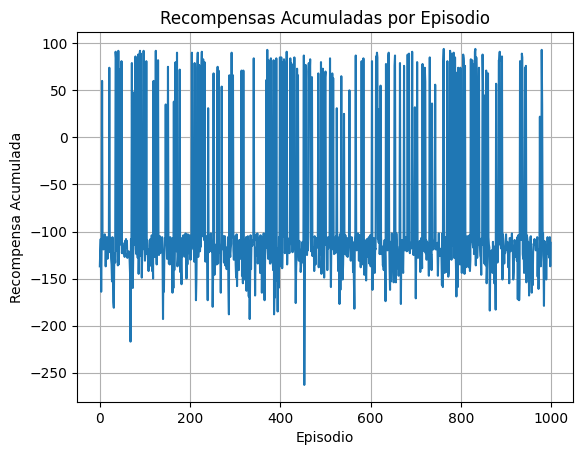


Matriz de Valores Finales de los Estados (10x10):
   0.00  -11.56    0.00    7.56    0.65    0.00  -17.81  -21.84    0.00  -32.33
   5.74  -14.32    0.00  -24.82  -12.04  -40.68  -20.01  -24.73    0.00  -29.92
   0.00    3.44    5.64   26.78  -18.82  -21.08  -22.69    0.00  -19.88  -15.20
 -20.35    0.00  -47.09    0.00  -41.66    0.00    0.00  -32.35    0.00  -55.07
 -12.94    0.00    0.00  -17.47    0.00    0.00    0.00  -19.41    0.00  -23.52
 -37.66  -49.86    0.00    0.00    0.00    0.00  -27.90    0.00  -31.14    0.00
 -38.68  -54.50  -50.13    0.00  -47.87  -49.95  -60.29  -52.29  -43.31  -50.35
   0.00  -34.36    0.00  -38.33  -43.02  -43.05  -44.11  -43.77  -44.23  -45.29
 -30.35  -28.30  -23.85  -30.29  -24.93  -23.80  -25.27  -23.45  -24.83  -26.03
 -22.73  -23.27  -23.05  -25.44  -24.06  -23.81  -22.42    0.00  -23.00  -22.95


In [16]:
# Ejecutar la simulación con actualización en tiempo real usando la ecuación de Bellman
recompensas = bellmanDP()
mostrarGraficoRecompensas(recompensas)
mostrarMatrizValores()

### CAMBIOS

- La meta del jugador es ganar la partida llegando a una de las casillas marcadas en azul
- El jugardor pierde la partida si cae en una de las casillas marcadas en rojo
- En cada jugada, **antes de lanzar el dado**, el jugador dedice si quiere avanzar o retroceder el número de casillas indicadas por lado
- El dado está cargado con probalidades **p =[p1,p2,p3,p4,p5,p6]**
- En las casillas 1 y 100 la ficha rebota (si se supera el extremo, se avanza en la otra dirección la cantidad restante)

### _Punto 1:_

### 1. Modelado del problema como un MDP

Modele este problema como un MDP. Detalle todos los elementos del MDP:

- **Estados**  
- **Recompensas**  
- **Acciones**  
- **Dinámica de transición**:  
  $$ p(s', r \mid s, a) \quad \forall s, s', r, a $$  
- **Factor de descuento**

Lo primero que se realiza definir las librerias con las que se van a trabajar

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

Con los datos suministrados en el enunciado, se puede colocar podemos definir las variables con las que vamos a trabajar a lo largo del problema. Con estas varibales podemos definir una función que tenga como objetivo modelar el MDP, dando como resultado la transciones y las recompensas asciadas a estas.

In [19]:
# informacion inicial que se suministra en el enunciado

gamma = 0.9
tamaño_tablero = 100
serpientes = {98:28, 95:24, 83:19, 73:1, 69:33, 64:36, 59:17, 55:7, 52:11, 48:9, 46:5, 44:22} #en esta parte el usuario ingresa como llave la casilla en la que debe caer el usuario y como valor la celda a la que llega
escaleras = {21:82, 43:77, 50:91, 54:93, 62:96, 66:87, 80:100} #en esta parte el usuario ingresa como llave la casilla en la que debe caer el usuario y como valor la celda a la que llega
gana = {80,100} #el usuario ingresa las celdas azules
pierde = {23, 37, 45, 67, 89} #el usuario ingresa la celdas rojas
acciones = [-1,1]
probabilidades = np.ones(6)/6 #se tiene un dado con probabilidades uniformes
estados = np.arange(1, tamaño_tablero+1) # se configura de esta manera para que vaya desde el 1 al 100
estados

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [20]:
# esta funcion es la encarada de definir la dinamica del sistema no da como resultados las transiciones que se pueden hacer desde un estado a todos los demas y tambien las recompesas que por esa transicion

def construir_MDP(probabilidades, estados):


    transicion = {}
    recompensas = {}

    # se recorre por estados y acciones para hacer todas las combinaciones posibles y tener completo el MDP
    for s in estados:
        for a in acciones:
            transicion[(s,a)] = []
            recompensas[(s,a)] = []

            for dado, probabilidad in zip(range(1,7), probabilidades):


                nuevo_estado = s + (a*dado)
                # ajuste para condiciones de borde y cambios de estado por escalera y serpientes
                if nuevo_estado > 100:
                    nuevo_estado = 100 - (nuevo_estado-100)
                elif nuevo_estado == 0:
                    nuevo_estado = 1 + (nuevo_estado + 1)
                elif nuevo_estado <= -1:
                    nuevo_estado = 1 - (nuevo_estado -1)

                if nuevo_estado in serpientes:
                    nuevo_estado = serpientes[nuevo_estado]
                elif nuevo_estado in escaleras:
                    nuevo_estado = escaleras[nuevo_estado]

                # ajuste de las nuevas recompensas por los cambios de estado
                recompensa = 0

                if nuevo_estado in pierde:
                    recompensa = -100
                elif nuevo_estado in gana:
                    recompensa = 100
                else:
                    recompensa = -1

                transicion[(s,a)].append((nuevo_estado, probabilidad)) # en estos diccionarios se almacena la informacion de cada transicion
                recompensas[(s,a)].append((probabilidad, recompensa)) # en estos diccionarios se almacena la informacion de cada transicion

    return transicion, recompensas

In [23]:
# ya se definieron los insumos necesarios para poder implementar el algortimo de iteracion de valor

def interacion_valor(gana, pierde, transicion, recompensas, estados, acciones, tamaño_tablero, gamma, error= 1e-2):
    #inicializacion de valores en cero para estados V y politica pi

    V = np.zeros(tamaño_tablero+1)
    pi = np.zeros(tamaño_tablero+1)

    for s in gana:
        V[s] = 100
    for s in pierde:
        V[s] = -100

    delta = 100
    while delta >= error:
        delta = 0

        for s in estados:

            if s in gana or s in pierde:
                continue
            print("estado = ", s)

            #inicializacion de funcion de valor de estado
            mejor_V = 0
            mejor_accion = np.random.choice([-1, 1])

            for a in acciones:

                valor = 0
                print("acciones = ", a)

                for (nuevo_estado, probabilidad), (probabilidad_r, recompensa) in zip(transicion[(s,a)], recompensas[(s,a)]):
                    print("nuevo_estado = ", nuevo_estado)
                    print("recompensa = ", recompensa)
                    print("probabilidad = ", probabilidad)
                    contribucion  = probabilidad * (recompensa + (gamma*V[nuevo_estado]))
                    print("valorrr = ", contribucion )
                    valor += contribucion
                    print("valor = ", valor)

                if valor > mejor_V:
                    mejor_V = valor
                    mejor_accion = a

                print("mejor Valor=", mejor_V)


            delta = max(delta, abs(V[s]-mejor_V))

            V[s] = mejor_V
            pi[s] = mejor_accion

    return pi, V, delta


In [24]:
transicion, recompensas = construir_MDP(probabilidades, estados)

In [25]:
transicion

{(1, -1): [(2, 0.16666666666666666),
  (3, 0.16666666666666666),
  (4, 0.16666666666666666),
  (5, 0.16666666666666666),
  (6, 0.16666666666666666),
  (7, 0.16666666666666666)],
 (1, 1): [(2, 0.16666666666666666),
  (3, 0.16666666666666666),
  (4, 0.16666666666666666),
  (5, 0.16666666666666666),
  (6, 0.16666666666666666),
  (7, 0.16666666666666666)],
 (2, -1): [(1, 0.16666666666666666),
  (2, 0.16666666666666666),
  (3, 0.16666666666666666),
  (4, 0.16666666666666666),
  (5, 0.16666666666666666),
  (6, 0.16666666666666666)],
 (2, 1): [(3, 0.16666666666666666),
  (4, 0.16666666666666666),
  (5, 0.16666666666666666),
  (6, 0.16666666666666666),
  (7, 0.16666666666666666),
  (8, 0.16666666666666666)],
 (3, -1): [(2, 0.16666666666666666),
  (1, 0.16666666666666666),
  (2, 0.16666666666666666),
  (3, 0.16666666666666666),
  (4, 0.16666666666666666),
  (5, 0.16666666666666666)],
 (3, 1): [(4, 0.16666666666666666),
  (5, 0.16666666666666666),
  (6, 0.16666666666666666),
  (7, 0.166666666666

In [26]:
recompensas

{(1, -1): [(0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1)],
 (1, 1): [(0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1)],
 (2, -1): [(0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1)],
 (2, 1): [(0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1)],
 (3, -1): [(0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666666666, -1)],
 (3, 1): [(0.16666666666666666, -1),
  (0.16666666666666666, -1),
  (0.16666666666

In [27]:
pi, V, delta= interacion_valor(gana, pierde, transicion, recompensas, estados, acciones, tamaño_tablero, gamma, error= 1e-3)

estado =  1
acciones =  -1
nuevo_estado =  2
recompensa =  -1
probabilidad =  0.16666666666666666
valorrr =  -0.16666666666666666
valor =  -0.16666666666666666
nuevo_estado =  3
recompensa =  -1
probabilidad =  0.16666666666666666
valorrr =  -0.16666666666666666
valor =  -0.3333333333333333
nuevo_estado =  4
recompensa =  -1
probabilidad =  0.16666666666666666
valorrr =  -0.16666666666666666
valor =  -0.5
nuevo_estado =  5
recompensa =  -1
probabilidad =  0.16666666666666666
valorrr =  -0.16666666666666666
valor =  -0.6666666666666666
nuevo_estado =  6
recompensa =  -1
probabilidad =  0.16666666666666666
valorrr =  -0.16666666666666666
valor =  -0.8333333333333333
nuevo_estado =  7
recompensa =  -1
probabilidad =  0.16666666666666666
valorrr =  -0.16666666666666666
valor =  -0.9999999999999999
mejor Valor= 0
acciones =  1
nuevo_estado =  2
recompensa =  -1
probabilidad =  0.16666666666666666
valorrr =  -0.16666666666666666
valor =  -0.16666666666666666
nuevo_estado =  3
recompensa =  -

In [28]:
delta

0.0008275324718560739

In [29]:
V[1:100]

array([  13.70206548,   14.34544369,   15.14555771,   16.05057426,
         16.83755224,   17.52188782,   18.11696897,   18.63443742,
         20.47946177,   22.08383502,   22.08390189,   22.08396617,
         22.08402796,   22.08408736,   32.77945962,   32.77950691,
         22.08424249,   22.08429358,   22.08434269,   22.0843899 ,
         22.08443528,   32.7797478 , -100.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       -100.        ,   17.92488204,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,   15.69665217,
       -100.        ,   19.6310397 ,   19.77475125,   21.59828653,
         21.1442388 ,   19.88668691,   20.56770067,   20.53000906,
         20.73277098,   20.15849826,   21.59841685,   25.10767683,
         25.10769671,   21.83280303,   21.79507795,   28.80802

In [30]:
pi[1:100]

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  0., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  0.,  1., -1.,
       -1.,  1.,  1., -1., -1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0., -1., -1., -1., -1., -1., -1., -1., -1.,  0., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Implementacion Monte Carlo Off-Policy

En este caso se empieza creando una funcion que simule los eventos de la politica b que es soft


In [31]:
# se genera la politica soft "asigna probabilidades a todos los estados"
def politica_soft(estados):
  pi_b = {}
  for s in estados:
    probabilidad = np.random.uniform(0.01, 0.99) #siempre va a dar probabilidas aleatoria a los esgados
    pi_b[s] = {-1: probabilidad, 1: 1-probabilidad}
  return pi_b

# en la simulacion se debe elegir una accion en cada estado
def accion_soft(estado, pi_b):

  acciones_con_probabilidades = pi_b[estado]

  lista_acciones = []
  lista_probabilidad = []

  for accion, prob in acciones_con_probabilidades.items():
    lista_acciones.append(accion)
    lista_probabilidad.append(prob)

    #toma una accion al azar pero teniendo en cuenta las probabilidad en las que pueden ocurrir

  accion_elegida = np.random.choice(lista_acciones, p = lista_probabilidad)


  return accion_elegida

#teniendo la politica y que se hace en cada estado toca definir en el ambiente las transiciones

def transicion_recompensa_montecarlo(estado, accion, dado, tamaño_tablero, escalera, serpientes):
  nuevo_estado = estado + (accion*dado)
  # ajuste para condiciones de borde y cambios de estado por escalera y serpientes
  if nuevo_estado > 100:
    nuevo_estado = 100 - (nuevo_estado-100)
  elif nuevo_estado == 0:
    nuevo_estado = 1 + (nuevo_estado + 1)
  elif nuevo_estado <= -1:
    nuevo_estado = 1 - (nuevo_estado -1)

  if nuevo_estado in serpientes:
    nuevo_estado = serpientes[nuevo_estado]
  elif nuevo_estado in escalera:
    nuevo_estado = escalera[nuevo_estado]

  # ajuste de las nuevas recompensas por los cambios de estado
  recompensa = 0

  if nuevo_estado in pierde:
    recompensa = -100
  elif nuevo_estado in gana:
    recompensa = 100
  else:
    recompensa = -1


  return nuevo_estado, recompensa

#ya con estas funciones podemos crear la simulacion de un episodio bajo la politica que definamos
def sumulacion(pi_b, tamaño_tablero, escaleras, serpientes, gana, pierde, probabilidades):

  episodio = []
  estado = 1 #esto lo puede cambiar la persona para definir desde donde empieza la partida para nuestro caso arracamos desde la casilla 1

  while estado not in gana and estado not in pierde:
    accion = accion_soft(estado, pi_b)
    dado = np.random.choice(np.arange(1,7), p = probabilidades)
    nuevo_estado, recompensa = transicion_recompensa_montecarlo(estado, accion, dado, tamaño_tablero, escaleras, serpientes)

    episodio.append((estado, accion, recompensa))
    estado = nuevo_estado

  return episodio

In [38]:
 # esta celda es de pruebas para ver que cada funcicion cumpliera con su parte

pi_b = politica_soft(estados)
accion = accion_soft(1, pi_b)
nuevo_estado_recompensa = transicion_recompensa_montecarlo(1, accion, 3, tamaño_tablero, escaleras, serpientes)

In [33]:
pi_b

{1: {-1: 0.46832549969985005, 1: 0.53167450030015},
 2: {-1: 0.21404459329035885, 1: 0.7859554067096411},
 3: {-1: 0.1576567034919403, 1: 0.8423432965080597},
 4: {-1: 0.9639122817952396, 1: 0.03608771820476042},
 5: {-1: 0.6766452802343036, 1: 0.3233547197656964},
 6: {-1: 0.4430939737469994, 1: 0.5569060262530006},
 7: {-1: 0.912310810048441, 1: 0.08768918995155905},
 8: {-1: 0.01176309845958083, 1: 0.9882369015404192},
 9: {-1: 0.5728577148754459, 1: 0.4271422851245541},
 10: {-1: 0.3308420309909814, 1: 0.6691579690090186},
 11: {-1: 0.15322664337832878, 1: 0.8467733566216712},
 12: {-1: 0.19721970186298188, 1: 0.8027802981370181},
 13: {-1: 0.2364385719417721, 1: 0.7635614280582279},
 14: {-1: 0.020977936060390466, 1: 0.9790220639396096},
 15: {-1: 0.5919423612373539, 1: 0.4080576387626461},
 16: {-1: 0.5488032020760025, 1: 0.4511967979239975},
 17: {-1: 0.2892521201202478, 1: 0.7107478798797522},
 18: {-1: 0.4429575017303861, 1: 0.5570424982696138},
 19: {-1: 0.1731441541138827, 1

In [41]:
print("La accion que tomas es ", accion, "\n", "En este caso se lee lee como que el nuevo estado es 4 y en este estado tiene una recompensa de -1 ",nuevo_estado_recompensa)

La accion que tomas es  1 
 En este caso se lee lee como que el nuevo estado es 4 y en este estado tiene una recompensa de -1  (4, -1)


In [94]:
sumulacion(pi_b, tamaño_tablero, escaleras, serpientes, gana, pierde, probabilidades)

[(1, 1, -1),
 (7, -1, -1),
 (6, 1, -1),
 (12, 1, -1),
 (18, 1, -1),
 (82, 1, -1),
 (86, 1, -1),
 (87, -1, -1),
 (85, 1, -1),
 (91, -1, -1),
 (85, 1, -1),
 (87, 1, -1),
 (93, -1, -100)]

Una vez se creado el ambiente para crear simulaciones, se tiene el insumo necesario para realizar el algoritmo de Monte-Carlo Off-Policy

In [95]:
def montecarlo_off_policy(episodios, estados, escaleras, serpientes, probabilidades, gamma):

  Q = defaultdict(lambda: {a: 0.0 for a in [-1, 1]}) #tabla de valores de Q(s,a)
  C = defaultdict(lambda: {a: 0.0 for a in [-1, 1]}) #tabla de los pesos de W

  pi_b = politica_soft(estados)

  for i in range(episodios):
    #se simula los episodios con als funciones que se crearon previamente

    episodio = sumulacion(pi_b, tamaño_tablero, escaleras, serpientes, gana, pierde, probabilidades)

    G = 0 # se inicializa el retorno
    W = 1 # encaso de que se visite se le da un peso de 1 para que se tenga en cuenta

    #se crea la politica objetivo
    politica_objetivo = {}
    for s in estados:
      acciones = Q[s]

      mejor_accion = None
      mejor_valor = -100000

      for a in acciones:
        if acciones[a] > mejor_valor:

          mejor_valor = acciones[a]
          mejor_accion = a

      politica_objetivo[s] = mejor_accion

    #ahora se recorre el episodio en sentido contrario
    for s, a, r in reversed(episodio):

      G = r + gamma * G # se actualiza
      C[s][a] += W # Acumulo peso para promedio pesado

      #actualizo Q con el promedio pesado
      Q[s][a] += (W/C[s][a]) * (G-Q[s][a])

      # cuando un estado accion no se encuentra no sigue
      if a != politica_objetivo.get(s, a):
        break

      #ahora se actualizan los pesos de los que si se encontraton
      prob_objetivo = 1
      prob_comportamiento = pi_b[s][a]
      W *= prob_objetivo/prob_comportamiento

      if W == 0:
        break
  politica_optima = {}

  for s in estados:
    acciones = Q[s]
    mejor_accion = None
    mejor_valor = -100000
    for a in acciones:
      if acciones[a] > mejor_valor:

        mejor_valor = acciones[a]
        mejor_accion = a

    politica_optima[s] = mejor_accion

  return politica_optima, Q

In [99]:
politica_optima, Q = montecarlo_off_policy(2, estados, escaleras, serpientes, probabilidades, gamma)

politica_optima

{1: -1,
 2: -1,
 3: -1,
 4: -1,
 5: -1,
 6: -1,
 7: -1,
 8: -1,
 9: -1,
 10: -1,
 11: -1,
 12: -1,
 13: -1,
 14: -1,
 15: -1,
 16: -1,
 17: 1,
 18: -1,
 19: -1,
 20: -1,
 21: -1,
 22: -1,
 23: -1,
 24: -1,
 25: -1,
 26: -1,
 27: -1,
 28: -1,
 29: -1,
 30: -1,
 31: -1,
 32: -1,
 33: -1,
 34: -1,
 35: -1,
 36: -1,
 37: -1,
 38: -1,
 39: -1,
 40: -1,
 41: -1,
 42: -1,
 43: -1,
 44: -1,
 45: -1,
 46: -1,
 47: -1,
 48: -1,
 49: -1,
 50: -1,
 51: -1,
 52: -1,
 53: -1,
 54: -1,
 55: -1,
 56: -1,
 57: -1,
 58: -1,
 59: -1,
 60: -1,
 61: -1,
 62: -1,
 63: -1,
 64: -1,
 65: -1,
 66: -1,
 67: -1,
 68: -1,
 69: -1,
 70: -1,
 71: -1,
 72: -1,
 73: -1,
 74: -1,
 75: -1,
 76: -1,
 77: -1,
 78: -1,
 79: -1,
 80: -1,
 81: -1,
 82: -1,
 83: -1,
 84: -1,
 85: -1,
 86: -1,
 87: -1,
 88: -1,
 89: -1,
 90: -1,
 91: -1,
 92: -1,
 93: -1,
 94: -1,
 95: -1,
 96: -1,
 97: -1,
 98: -1,
 99: -1,
 100: -1}